In [ ]:
import pandas as pd
import numpy as np
import requests
import json
from matplotlib import pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
census_api = requests.get('https://api.census.gov/data/2017/acs/acs5/profile?get=group(DP03)&for=zip%20code%20tabulation%20area:48127&in=state:26&key=367661616b8cd055c91fe0292b28163c9bfeb7a4')
text = census_api.text
print(text)

[["DP03_0001E","DP03_0001EA","DP03_0001M","DP03_0001MA","DP03_0001PE","DP03_0001PEA","DP03_0001PM","DP03_0001PMA","DP03_0002E","DP03_0002EA","DP03_0002M","DP03_0002MA","DP03_0002PE","DP03_0002PEA","DP03_0002PM","DP03_0002PMA","DP03_0003E","DP03_0003EA","DP03_0003M","DP03_0003MA","DP03_0003PE","DP03_0003PEA","DP03_0003PM","DP03_0003PMA","DP03_0004E","DP03_0004EA","DP03_0004M","DP03_0004MA","DP03_0004PE","DP03_0004PEA","DP03_0004PM","DP03_0004PMA","DP03_0005E","DP03_0005EA","DP03_0005M","DP03_0005MA","DP03_0005PE","DP03_0005PEA","DP03_0005PM","DP03_0005PMA","DP03_0006E","DP03_0006EA","DP03_0006M","DP03_0006MA","DP03_0006PE","DP03_0006PEA","DP03_0006PM","DP03_0006PMA","DP03_0007E","DP03_0007EA","DP03_0007M","DP03_0007MA","DP03_0007PE","DP03_0007PEA","DP03_0007PM","DP03_0007PMA","DP03_0008E","DP03_0008EA","DP03_0008M","DP03_0008MA","DP03_0008PE","DP03_0008PEA","DP03_0008PM","DP03_0008PMA","DP03_0009E","DP03_0009EA","DP03_0009M","DP03_0009MA","DP03_0009PE","DP03_0009PEA","DP03_0009PM","DP03

In [ ]:
#Import raw per person exenditure dataset
ppe_df = pd.read_excel('/work/SIADS697_TeamMADScientists/assets/ppe_mi.xlsx', sheet_name = 'PPE')
ppe_df.head()

/root/venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,DateExtracted,SCHOOL YEAR,ST,STATENAME,LEAID,ST LEAID,LEA NAME,SCHID,ST SCHID,SCH NAME,...,Students,Teachers,SY1819 SY_STATUS_TEXT,SY1819 SCH_OR_LEA_TYPE,SY 1819 CHARTER_TEXT,SY 1819 GSLO,SY1819 GSHI,SY1819 LEVEL,SY 1819 TITLEI_STATUS,SY1819 CHARTER_LEA_TXT
0,11nov2020 18:23:52,2018-19,MI,MICHIGAN,2600005,MI-13020,BATTLE CREEK PUBLIC SCHOOLS,260000500477,MI-13020-07572,BATTLE CREEK MATHSCI CENTER,...,0,12.00,Open,Regular School,No,08,12,High,Not a Title I school,NaN
1,11nov2020 18:23:52,2018-19,MI,MICHIGAN,2600005,MI-13020,BATTLE CREEK PUBLIC SCHOOLS,260000500807,MI-13020-08574,WK KELLOGG PREPARATORY HIGH SCHOOL,...,195,8.60,Open,Alternative School,No,08,12,High,Title I schoolwide school,NaN
2,11nov2020 18:23:52,2018-19,MI,MICHIGAN,2600005,MI-13020,BATTLE CREEK PUBLIC SCHOOLS,260000501683,MI-13020-09351,ANN J KELLOGG SCHOOL,...,269,18.00,Open,Regular School,No,03,05,Elementary,Title I schoolwide school,NaN
3,11nov2020 18:23:52,2018-19,MI,MICHIGAN,2600005,MI-13020,BATTLE CREEK PUBLIC SCHOOLS,260000501684,MI-13020-09352,LAMORA PARK SCHOOL,...,222,13.55,Open,Regular School,No,PK,02,Elementary,Title I schoolwide school,NaN
4,11nov2020 18:23:52,2018-19,MI,MICHIGAN,2600005,MI-13020,BATTLE CREEK PUBLIC SCHOOLS,260000503830,MI-13020-00223,BATTLE CREEK CENTRAL HIGH SCHOOL,...,1041,56.87,Open,Regular School,No,09,12,High,Title I schoolwide school,NaN


In [ ]:
#Detroit City Zip Codes
zip_codes = [48127, 48239, 48219, 48223, 48228, 48126, 48120, 48217, 48235,
                48227, 48221, 48238, 48204, 48210, 48209, 48206, 48208, 48216,
                48203, 48202, 48201, 48226, 48234, 48212, 48211, 48207, 48205,
                48213, 48214, 48215, 48224, 48236, 48207]

#Irrelevant Columns to drop from ppe_df
cols_to_drop = ['DateExtracted','ST', 'STATENAME', 'LEAID', 'ST LEAID',
       'LEA NAME', 'SCHID', 'ST SCHID', 'ReportUrl', 'ZipCodePlusFour', 'Phone',
       'SY1819 SY_STATUS_TEXT', 'SY 1819 GSLO', 'SY1819 GSHI']

In [ ]:
#Drop blank columns
ppe_df.dropna(axis = 1, how = 'all', inplace = True)
ppe_df = ppe_df.drop(columns = cols_to_drop)

#Create new feature to show number of students per teacher at each school
ppe_df['studentsperteacher'] = ppe_df['Students']/ppe_df['Teachers']

In [ ]:
#ppe_df filtering and transformations

#Filter to only schools in Detroit City zip codes
ppe_df = ppe_df[ppe_df['ZipCode'].isin(zip_codes)]

#Filter out school levels of non interest (elementary schools, middle schools, special ed, etc.)
ppe_df = ppe_df[ppe_df['SY1819 LEVEL'].isin(['High', 'Other'])]
ppe_df = ppe_df[ppe_df['SY1819 SCH_OR_LEA_TYPE'] != 'Special Education School']

#Only use schools with more than ten students
ppe_df = ppe_df[ppe_df['Students'] > 10]

#Create new binary variable to describe schools who are heavily government funded or not
ppe_df = pd.get_dummies(ppe_df, columns = ['SY 1819 TITLEI_STATUS']).drop(columns = ['SY 1819 TITLEI_STATUS_Title I schoolwide eligible school-No program', 'SY 1819 TITLEI_STATUS_Title I targeted assistance school'])
ppe_df = ppe_df.rename({'SY 1819 TITLEI_STATUS_Not a Title I school': 'Not Title I Funded', 'SY 1819 TITLEI_STATUS_Title I schoolwide school': 'Title I Funded'}, axis = 1)

#Update School name for joining purposes
wsa_indexes = ppe_df[ppe_df['SCH NAME'] == 'WEST SIDE ACADEMY OF INFORMATION TECHNOLOGY AND CYBER SECURI'].index.values
ppe_df.loc[wsa_indexes, 'SCH NAME'] = 'WEST SIDE ACADEMY OF INFORMATION TECHNOLOGY AND CYBER SECURITY'

In [ ]:
#Look at schools left after filtering
ppe_schools = ppe_df['SCH NAME'].unique()
ppe_schools

array(['CRESTWOOD HIGH SCHOOL', 'CESAR CHAVEZ HIGH SCHOOL',
       'DETROIT COMMUNITY SCHOOLS  HIGH SCHOOL',
       'OAKLAND INTERNATIONAL ACADEMY  HIGH SCHOOL',
       'VOYAGEUR COLLEGE PREP', 'STAR INTERNATIONAL ACADEMY',
       'DETROIT EDISON PUBLIC SCHOOL ACADEMY  HIGH SCHOOL',
       'DAVID ELLIS ACADEMY', 'UNIVERSAL ACADEMY',
       'OLD REDFORD ACADEMY  HIGH', 'HOPE OF DETROIT ACADEMY  ELEMENTARY',
       'HOPE OF DETROIT ACADEMY  MIDDLEHIGH', 'JOY PREPARATORY ACADEMY',
       'ADVANCED TECHNOLOGY ACADEMY', 'RIVERSIDE ACADEMY  WEST CAMPUS',
       'FRONTIER INTERNATIONAL ACADEMY',
       'COVENANT HOUSE ACADEMY DETROIT  SOUTHWEST SITE',
       'COVENANT HOUSE ACADEMY DETROIT  EAST SITE',
       'COVENANT HOUSE ACADEMY DETROIT  CENTRAL SITE',
       'ACE ACADEMY SDA GLENDALE LINCOLN WOODWARD',
       'ACE ACADEMY  JEFFERSON SITE', 'CLARA B FORD ACADEMY SDA',
       'VISTA MEADOWS ACADEMY',
       'UNIVERSITY PREPARATORY SCIENCE AND MATH PSAD HIGH SCHOOL',
       'UNIVERSITY PREP

In [ ]:
#ppe_df.groupby('ZipCode')['TotalPpeTotal'].mean().sort_values(ascending = False)

In [ ]:
#Load in raw testing information for 2018-2019 school year
hs_1819_df = pd.read_csv('/work/SIADS697_TeamMADScientists/assets/mstep_access_1819.csv')

In [ ]:
#drop null columns
hs_1819_df.dropna(axis = 1, how = 'all', inplace = True)
hs_1819_df.head()

,SchoolYear,IsdCode,IsdName,DistrictCode,DistrictName,BuildingCode,BuildingName,CountyCode,CountyName,EntityType,...,Subject,TestingGroup,NumberAboveAverageGrowth,NumberAverageGrowth,NumberBelowAverageGrowth,PercentAboveAverage,PercentAverageGrowth,PercentBelowAverage,TotalIncluded,MeanSGP
0,2018-2019,82,Wayne RESA,82015,Detroit Public Schools Community District,0,All Buildings,82,Wayne,LEA District,...,Science,All Students,< 10,21,28,10.90,38.20,50.90,55,36.10
1,2018-2019,82,Wayne RESA,82015,Detroit Public Schools Community District,0,All Buildings,82,Wayne,LEA District,...,Science,Economically Disadvantaged,< 10,18,26,10.20,36.70,53.10,49,35.00
2,2018-2019,82,Wayne RESA,82015,Detroit Public Schools Community District,0,All Buildings,82,Wayne,LEA District,...,Science,Not Economically Disadvantaged,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10
3,2018-2019,82,Wayne RESA,82015,Detroit Public Schools Community District,0,All Buildings,82,Wayne,LEA District,...,Science,"Black, not of Hispanic origin",< 10,21,28,10.90,38.20,50.90,55,36.10
4,2018-2019,82,Wayne RESA,82015,Detroit Public Schools Community District,0,All Buildings,82,Wayne,LEA District,...,Science,Male,< 10,18,12,14.30,51.40,34.30,35,43.30


In [ ]:
#drop unwanted and uninformative columns from the testing data
cols_to_drop = ['IsdCode', 'IsdName','DistrictCode','DistrictName','BuildingCode', 'CountyCode', 'CountyName', 'EntityType', 'Locale']
hs_1819_df = hs_1819_df.drop(columns = cols_to_drop)

In [ ]:
#Filter school names for joining dataset on ppe_df
hs_1819_df['BuildingName'] = hs_1819_df.BuildingName.apply(str.upper)
mlk_indexes = hs_1819_df[hs_1819_df['BuildingName'] == 'MARTIN LUTHER KING JR. SENIOR HIGH SCHOOL'].index.values
hs_1819_df.loc[mlk_indexes, 'BuildingName'] = 'MARTIN LUTHER KING JR SENIOR HIGH SCHOOL'

In [ ]:
#Look at schools after filtering
hs_1819_df.BuildingName.unique()

array(['ALL BUILDINGS', 'HENDERSON ACADEMY',
       'A.L. HOLMES ACADEMY OF BLENDED LEARNING', 'CODY HIGH SCHOOL',
       'DAVIS AEROSPACE TECHNICAL HIGH SCHOOL AT GOLIGHTLY',
       'OSBORN HIGH SCHOOL',
       'DETROIT INTERNATIONAL ACADEMY FOR YOUNG WOMEN',
       'ANN ARBOR TRAIL MAGNET SCHOOL',
       'BAGLEY ELEMENTARY SCHOOL OF JOURNALISM AND TECHNOLOGY',
       'GOLIGHTLY EDUCATION CENTER', 'ROBERTO CLEMENTE LEARNING ACADEMY',
       'BENNETT ELEMENTARY SCHOOL', 'BUNCHE PREPARATORY ACADEMY',
       'BURNS ELEMENTARY-MIDDLE SCHOOL', 'BURTON INTERNATIONAL ACADEMY',
       'CARSTENS ELEMENTARY-MIDDLE SCHOOL', 'CARVER STEM ACADEMY',
       'CASS TECHNICAL HIGH SCHOOL', 'CENTRAL HIGH SCHOOL',
       'CHRYSLER ELEMENTARY SCHOOL', 'COOKE STEM ACADEMY',
       'MACKENZIE ELEMENTARY-MIDDLE SCHOOL',
       'THURGOOD MARSHALL ELEMENTARY SCHOOL',
       'MUNGER ELEMENTARY-MIDDLE SCHOOL',
       'EARHART ELEMENTARY-MIDDLE SCHOOL',
       'BENJAMIN CARSON HIGH SCHOOL OF SCIENCE AND MEDICINE'

In [ ]:
#Match schools that belong to both datasets
mstep_schools = hs_1819_df.BuildingName.unique()

test = []
for school in mstep_schools:
    if school in list(ppe_schools):
        test.append(school)

test

['CODY HIGH SCHOOL',
 'DAVIS AEROSPACE TECHNICAL HIGH SCHOOL AT GOLIGHTLY',
 'OSBORN HIGH SCHOOL',
 'DETROIT INTERNATIONAL ACADEMY FOR YOUNG WOMEN',
 'CASS TECHNICAL HIGH SCHOOL',
 'CENTRAL HIGH SCHOOL',
 'BENJAMIN CARSON HIGH SCHOOL OF SCIENCE AND MEDICINE',
 'DENBY HIGH SCHOOL',
 'MARTIN LUTHER KING JR SENIOR HIGH SCHOOL',
 'EAST ENGLISH VILLAGE PREPARATORY ACADEMY',
 'HENRY FORD HIGH SCHOOL',
 'MUMFORD HIGH SCHOOL',
 'DETROIT COLLEGIATE PREPARATORY HIGH SCHOOL AT NORTHWESTERN',
 'PERSHING HIGH SCHOOL',
 'ACADEMY OF THE AMERICAS HIGH SCHOOL',
 'SOUTHEASTERN HIGH SCHOOL',
 'WESTERN INTERNATIONAL HIGH SCHOOL',
 'RENAISSANCE HIGH SCHOOL',
 'FREDERICK DOUGLASS ACADEMY FOR YOUNG MEN',
 'COMMUNICATION AND MEDIA ARTS HIGH SCHOOL',
 'DETROIT SCHOOL OF ARTS',
 'WEST SIDE ACADEMY OF INFORMATION TECHNOLOGY AND CYBER SECURITY']

In [ ]:
#schools_to_drop = [x for x in mstep_schools if x not in test]
#schools_to_drop

In [ ]:
hs_1819_df = hs_1819_df[hs_1819_df['BuildingName'].isin(test)]

In [ ]:
#Join ppe & testing datasets on school names
merged = ppe_df.merge(hs_1819_df, left_on= 'SCH NAME', right_on = 'BuildingName')

#Clean percentage text and update columns to correct float types
merged.replace('< 10', 5, inplace = True)
merged.replace('< 5', 1, inplace = True)
merged.iloc[:, -8:] = merged.iloc[:, -8:].astype(float)

merged

,SCHOOL YEAR,SCH NAME,StateLocalPpeSchoolShare,StateLocalPpeDistrictShare,FederalPpeSchoolShare,FederalPpeDistrictShare,TotalPpeSchoolShare,TotalPpeDistrictShare,TotalPpeTotal,StreetAddress,...,Subject,TestingGroup,NumberAboveAverageGrowth,NumberAverageGrowth,NumberBelowAverageGrowth,PercentAboveAverage,PercentAverageGrowth,PercentBelowAverage,TotalIncluded,MeanSGP
0,2018-19,COMMUNICATION AND MEDIA ARTS HIGH SCHOOL,7441.53,4590.77,852.03,937.63,8293.56,5528.4,13821.96,14771 MANSFIELD ST,...,Social Studies,All Students,34.0,46.0,20.0,34.0,46.0,20.0,100.0,56.5
1,2018-19,COMMUNICATION AND MEDIA ARTS HIGH SCHOOL,7441.53,4590.77,852.03,937.63,8293.56,5528.4,13821.96,14771 MANSFIELD ST,...,Social Studies,Economically Disadvantaged,28.0,39.0,14.0,34.6,48.1,17.3,81.0,58.0
2,2018-19,COMMUNICATION AND MEDIA ARTS HIGH SCHOOL,7441.53,4590.77,852.03,937.63,8293.56,5528.4,13821.96,14771 MANSFIELD ST,...,Social Studies,Not Economically Disadvantaged,5.0,5.0,5.0,31.6,36.8,31.6,19.0,50.0
3,2018-19,COMMUNICATION AND MEDIA ARTS HIGH SCHOOL,7441.53,4590.77,852.03,937.63,8293.56,5528.4,13821.96,14771 MANSFIELD ST,...,Social Studies,"Black, not of Hispanic origin",34.0,45.0,20.0,34.3,45.5,20.2,99.0,56.4
4,2018-19,COMMUNICATION AND MEDIA ARTS HIGH SCHOOL,7441.53,4590.77,852.03,937.63,8293.56,5528.4,13821.96,14771 MANSFIELD ST,...,Social Studies,"White, not of Hispanic origin",5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,2018-19,ACADEMY OF THE AMERICAS HIGH SCHOOL,7661.38,4590.77,4146.73,937.63,11808.11,5528.4,17336.51,2635 Howard,...,Social Studies,English Learners,5.0,11.0,14.0,10.7,39.3,50.0,28.0,33.5
1816,2018-19,ACADEMY OF THE AMERICAS HIGH SCHOOL,7661.38,4590.77,4146.73,937.63,11808.11,5528.4,17336.51,2635 Howard,...,Social Studies,Not English Learners,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1817,2018-19,ACADEMY OF THE AMERICAS HIGH SCHOOL,7661.38,4590.77,4146.73,937.63,11808.11,5528.4,17336.51,2635 Howard,...,Social Studies,Not Migrant,5.0,11.0,15.0,10.3,37.9,51.7,29.0,32.6
1818,2018-19,ACADEMY OF THE AMERICAS HIGH SCHOOL,7661.38,4590.77,4146.73,937.63,11808.11,5528.4,17336.51,2635 Howard,...,Social Studies,Students without Disabilities,5.0,5.0,10.0,14.3,38.1,47.6,21.0,34.0


In [ ]:
#Filter merged dataframe into different subgroups for EDA
all_1819_df = merged[(merged['TestingGroup'] == 'All Students') & (merged['Grade'] == 'All Grades')]
disadvantaged_1819 = merged[(merged['TestingGroup'] == 'Economically Disadvantaged') & (merged['Grade'] == 'All Grades')]
not_disadvantaged_1819 = merged[(merged['TestingGroup'] == 'Not Economically Disadvantaged') & (merged['Grade'] == 'All Grades')]

# Save to Excel
all_1819_df.to_csv('/work/SIADS697_TeamMADScientists/assets/saved_data/all_1819_df.csv')

In [ ]:
#Group non disadvantaged students by zip code
math_ned = not_disadvantaged_1819[not_disadvantaged_1819['Subject'] == 'Mathematics']
math_ned = math_ned.groupby('ZipCode').mean().reset_index()
math_ned

,ZipCode,StateLocalPpeSchoolShare,StateLocalPpeDistrictShare,FederalPpeSchoolShare,FederalPpeDistrictShare,TotalPpeSchoolShare,TotalPpeDistrictShare,TotalPpeTotal,Students,Teachers,...,Not Title I Funded,Title I Funded,NumberAboveAverageGrowth,NumberAverageGrowth,NumberBelowAverageGrowth,PercentAboveAverage,PercentAverageGrowth,PercentBelowAverage,TotalIncluded,MeanSGP
0,48201,8016.873333,4590.77,1158.180000,937.63,9175.053333,5528.4,14703.453333,1070.333333,53.666667,...,0,1,14.333333,22.0,16.0,15.1,30.933333,25.600000,48.333333,31.300000
1,48202,11082.540000,4590.77,2551.860000,937.63,13634.390000,5528.4,19162.790000,263.000000,24.500000,...,0,1,5.000000,5.0,5.0,1.0,27.300000,72.700000,11.000000,20.400000
2,48205,10084.260000,4590.77,3353.120000,937.63,13437.380000,5528.4,18965.780000,517.000000,37.000000,...,0,1,5.000000,5.0,5.0,14.3,28.600000,57.100000,14.000000,33.900000
3,48206,6756.730000,4590.77,1884.080000,937.63,8640.810000,5528.4,14169.210000,306.000000,21.500000,...,0,1,5.000000,5.0,5.0,5.0,5.000000,5.000000,5.000000,5.000000
4,48207,7908.010000,4590.77,1467.420000,937.63,9375.430000,5528.4,14903.830000,1065.000000,57.000000,...,0,1,11.000000,23.0,15.0,22.4,46.900000,30.600000,49.000000,48.600000
5,48208,12984.876667,4590.77,2175.153333,937.63,15160.030000,5528.4,20688.430000,350.333333,25.000000,...,0,1,5.000000,5.0,5.0,21.5,9.400000,12.433333,7.000000,22.833333
6,48209,6184.640000,4590.77,1055.630000,937.63,7240.280000,5528.4,12768.680000,1880.000000,81.000000,...,0,1,5.000000,26.0,17.0,15.7,51.000000,33.300000,51.000000,45.200000
7,48214,12146.040000,4590.77,1558.730000,937.63,13704.770000,5528.4,19233.170000,153.000000,14.000000,...,0,1,5.000000,5.0,5.0,5.0,5.000000,5.000000,5.000000,5.000000
8,48215,11755.530000,4590.77,3135.920000,937.63,14891.460000,5528.4,20419.860000,168.000000,12.000000,...,0,1,5.000000,5.0,5.0,5.0,5.000000,5.000000,5.000000,5.000000
9,48216,7661.380000,4590.77,4146.730000,937.63,11808.110000,5528.4,17336.510000,123.000000,7.000000,...,0,1,5.000000,5.0,5.0,8.3,41.700000,50.000000,12.000000,35.900000


In [ ]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=math_ned['ZipCode'], y=math_ned['TotalPpeTotal'], name="$ ppe"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=math_ned['ZipCode'], y=math_ned['MeanSGP'], name="Mean SGP Math", mode = 'markers'),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Math Proficiency vs. PPE Not Disadvantaged"
)

fig.update_xaxes(title_text="Zip Code")
fig.update_yaxes(title_text="$ PPE", secondary_y=False)
fig.update_yaxes(title_text="% Above Average Math", secondary_y=True)

fig.show()

In [ ]:
#Group disadvantaged students by zip code
math_disadvantaged = disadvantaged_1819[disadvantaged_1819['Subject'] == 'Mathematics']
math_disadvantaged = math_disadvantaged.groupby('ZipCode').mean().reset_index()
math_disadvantaged

,ZipCode,StateLocalPpeSchoolShare,StateLocalPpeDistrictShare,FederalPpeSchoolShare,FederalPpeDistrictShare,TotalPpeSchoolShare,TotalPpeDistrictShare,TotalPpeTotal,Students,Teachers,...,Not Title I Funded,Title I Funded,NumberAboveAverageGrowth,NumberAverageGrowth,NumberBelowAverageGrowth,PercentAboveAverage,PercentAverageGrowth,PercentBelowAverage,TotalIncluded,MeanSGP
0,48201,8016.873333,4590.77,1158.180000,937.63,9175.053333,5528.4,14703.453333,1070.333333,53.666667,...,0,1,37.333333,64.666667,63.000000,17.833333,35.800000,46.366667,167.333333,37.900000
1,48202,11082.540000,4590.77,2551.860000,937.63,13634.390000,5528.4,19162.790000,263.000000,24.500000,...,0,1,5.000000,32.000000,37.000000,10.400000,41.600000,48.100000,77.000000,34.700000
2,48205,10084.260000,4590.77,3353.120000,937.63,13437.380000,5528.4,18965.780000,517.000000,37.000000,...,0,1,15.000000,35.000000,41.000000,16.500000,38.500000,45.100000,91.000000,39.300000
3,48206,6756.730000,4590.77,1884.080000,937.63,8640.810000,5528.4,14169.210000,306.000000,21.500000,...,0,1,5.000000,17.000000,25.000000,6.700000,37.800000,55.600000,45.000000,31.200000
4,48207,7908.010000,4590.77,1467.420000,937.63,9375.430000,5528.4,14903.830000,1065.000000,57.000000,...,0,1,19.000000,64.000000,96.000000,10.600000,35.800000,53.600000,179.000000,34.700000
5,48208,12984.876667,4590.77,2175.153333,937.63,15160.030000,5528.4,20688.430000,350.333333,25.000000,...,0,1,7.333333,17.333333,12.666667,14.933333,33.433333,23.300000,35.000000,31.866667
6,48209,6184.640000,4590.77,1055.630000,937.63,7240.280000,5528.4,12768.680000,1880.000000,81.000000,...,0,1,55.000000,131.000000,128.000000,17.500000,41.700000,40.800000,314.000000,42.600000
7,48214,12146.040000,4590.77,1558.730000,937.63,13704.770000,5528.4,19233.170000,153.000000,14.000000,...,0,1,5.000000,5.000000,20.000000,1.000000,25.900000,74.100000,27.000000,25.900000
8,48215,11755.530000,4590.77,3135.920000,937.63,14891.460000,5528.4,20419.860000,168.000000,12.000000,...,0,1,5.000000,14.000000,20.000000,12.800000,35.900000,51.300000,39.000000,35.100000
9,48216,7661.380000,4590.77,4146.730000,937.63,11808.110000,5528.4,17336.510000,123.000000,7.000000,...,0,1,5.000000,5.000000,5.000000,17.600000,47.100000,35.300000,17.000000,40.800000


In [ ]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=math_disadvantaged['ZipCode'], y=math_disadvantaged['TotalPpeTotal'], name="$ ppe"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=math_disadvantaged['ZipCode'], y=math_disadvantaged['MeanSGP'], name="Mean SGP Math", mode = 'markers'),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Math Proficiency vs. PPE Economically Disadvantaged"
)

fig.update_xaxes(title_text="Zip Code")
fig.update_yaxes(title_text="$ PPE", secondary_y=False)
fig.update_yaxes(title_text="% Above Average Math", secondary_y=True)

fig.show()

In [ ]:
math_disadvantaged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ZipCode                     17 non-null     int64  
 1   StateLocalPpeSchoolShare    17 non-null     float64
 2   StateLocalPpeDistrictShare  17 non-null     float64
 3   FederalPpeSchoolShare       17 non-null     float64
 4   FederalPpeDistrictShare     17 non-null     float64
 5   TotalPpeSchoolShare         17 non-null     float64
 6   TotalPpeDistrictShare       17 non-null     float64
 7   TotalPpeTotal               17 non-null     float64
 8   Students                    17 non-null     float64
 9   Teachers                    17 non-null     float64
 10  studentsperteacher          17 non-null     float64
 11  Not Title I Funded          17 non-null     uint8  
 12  Title I Funded              17 non-null     uint8  
 13  NumberAboveAverageGrowth    17 non-nu

In [ ]:
math_disadvantaged["ZipCode"]=math_disadvantaged["ZipCode"].astype("category")

In [ ]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=math_disadvantaged['ZipCode'], y=math_disadvantaged['TotalPpeTotal'], name="$ ppe"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=math_disadvantaged['ZipCode'], y=math_disadvantaged['MeanSGP'], name="Mean SGP Math", mode = 'markers'),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Math Proficiency vs. PPE Economically Disadvantaged"
)

fig.update_xaxes(title_text="Zip Code")
fig.update_yaxes(title_text="$ PPE", secondary_y=False)
fig.update_yaxes(title_text="% Above Average Math", secondary_y=True)

fig.show()

In [ ]:
math_disadvantaged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ZipCode                     17 non-null     category
 1   StateLocalPpeSchoolShare    17 non-null     float64 
 2   StateLocalPpeDistrictShare  17 non-null     float64 
 3   FederalPpeSchoolShare       17 non-null     float64 
 4   FederalPpeDistrictShare     17 non-null     float64 
 5   TotalPpeSchoolShare         17 non-null     float64 
 6   TotalPpeDistrictShare       17 non-null     float64 
 7   TotalPpeTotal               17 non-null     float64 
 8   Students                    17 non-null     float64 
 9   Teachers                    17 non-null     float64 
 10  studentsperteacher          17 non-null     float64 
 11  Not Title I Funded          17 non-null     uint8   
 12  Title I Funded              17 non-null     uint8   
 13  NumberAboveAverageGrow

In [ ]:
math_disadvantaged["ZipCode"]=math_disadvantaged["ZipCode"].astype("string")

In [ ]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=math_disadvantaged['ZipCode'], y=math_disadvantaged['TotalPpeTotal'], name="$ ppe"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=math_disadvantaged['ZipCode'], y=math_disadvantaged['MeanSGP'], name="Mean SGP Math", mode = 'markers'),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Math Proficiency vs. PPE Economically Disadvantaged"
)

fig.update_xaxes(title_text="Zip Code")
fig.update_yaxes(title_text="$ PPE", secondary_y=False)
fig.update_yaxes(title_text="% Above Average Math", secondary_y=True)
fig.update_xaxes(tickangle=45)
fig.show()

In [ ]:
math_ned["ZipCode"]=math_ned["ZipCode"].astype("string")

In [ ]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=math_ned['ZipCode'], y=math_ned['TotalPpeTotal'], name="$ ppe"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=math_ned['ZipCode'], y=math_ned['MeanSGP'], name="Mean SGP Math", mode = 'markers'),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Math Proficiency vs. PPE Not Disadvantaged"
)

fig.update_xaxes(title_text="Zip Code")
fig.update_yaxes(title_text="$ PPE", secondary_y=False)
fig.update_yaxes(title_text="% Above Average Math", secondary_y=True)
fig.update_xaxes(tickangle=45)

fig.show()

In [ ]:
all_1819_df.head()


,SCHOOL YEAR,SCH NAME,StateLocalPpeSchoolShare,StateLocalPpeDistrictShare,FederalPpeSchoolShare,FederalPpeDistrictShare,TotalPpeSchoolShare,TotalPpeDistrictShare,TotalPpeTotal,StreetAddress,...,Subject,TestingGroup,NumberAboveAverageGrowth,NumberAverageGrowth,NumberBelowAverageGrowth,PercentAboveAverage,PercentAverageGrowth,PercentBelowAverage,TotalIncluded,MeanSGP
0,2018-19,COMMUNICATION AND MEDIA ARTS HIGH SCHOOL,7441.53,4590.77,852.03,937.63,8293.56,5528.4,13821.96,14771 MANSFIELD ST,...,Social Studies,All Students,34.0,46.0,20.0,34.0,46.0,20.0,100.0,56.5
24,2018-19,COMMUNICATION AND MEDIA ARTS HIGH SCHOOL,7441.53,4590.77,852.03,937.63,8293.56,5528.4,13821.96,14771 MANSFIELD ST,...,English Language Arts,All Students,22.0,50.0,29.0,21.8,49.5,28.7,101.0,46.1
51,2018-19,COMMUNICATION AND MEDIA ARTS HIGH SCHOOL,7441.53,4590.77,852.03,937.63,8293.56,5528.4,13821.96,14771 MANSFIELD ST,...,Mathematics,All Students,26.0,39.0,36.0,25.7,38.6,35.6,101.0,47.3
66,2018-19,DETROIT SCHOOL OF ARTS,9830.65,4590.77,1213.57,937.63,11044.22,5528.4,16572.62,123 SELDEN ST,...,Social Studies,All Students,16.0,46.0,29.0,17.6,50.5,31.9,91.0,45.0
110,2018-19,DETROIT SCHOOL OF ARTS,9830.65,4590.77,1213.57,937.63,11044.22,5528.4,16572.62,123 SELDEN ST,...,English Language Arts,All Students,14.0,29.0,47.0,15.6,32.2,52.2,90.0,36.5


In [ ]:
all_1819_df.columns


Index(['SCHOOL YEAR', 'SCH NAME', 'StateLocalPpeSchoolShare',
       'StateLocalPpeDistrictShare', 'FederalPpeSchoolShare',
       'FederalPpeDistrictShare', 'TotalPpeSchoolShare',
       'TotalPpeDistrictShare', 'TotalPpeTotal', 'StreetAddress', 'City',
       'ZipCode', 'Students', 'Teachers', 'SY1819 SCH_OR_LEA_TYPE',
       'SY 1819 CHARTER_TEXT', 'SY1819 LEVEL', 'studentsperteacher',
       'Not Title I Funded', 'Title I Funded', 'SchoolYear', 'BuildingName',
       'SchoolLevel', 'Grade', 'Subject', 'TestingGroup',
       'NumberAboveAverageGrowth', 'NumberAverageGrowth',
       'NumberBelowAverageGrowth', 'PercentAboveAverage',
       'PercentAverageGrowth', 'PercentBelowAverage', 'TotalIncluded',
       'MeanSGP'],
      dtype='object')

In [ ]:
all_1819_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 1800
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SCHOOL YEAR                 75 non-null     object 
 1   SCH NAME                    75 non-null     object 
 2   StateLocalPpeSchoolShare    75 non-null     float64
 3   StateLocalPpeDistrictShare  75 non-null     float64
 4   FederalPpeSchoolShare       75 non-null     float64
 5   FederalPpeDistrictShare     75 non-null     float64
 6   TotalPpeSchoolShare         75 non-null     float64
 7   TotalPpeDistrictShare       75 non-null     float64
 8   TotalPpeTotal               75 non-null     float64
 9   StreetAddress               75 non-null     object 
 10  City                        75 non-null     object 
 11  ZipCode                     75 non-null     int64  
 12  Students                    75 non-null     int64  
 13  Teachers                    75 non-

In [ ]:
all_1819_df["TotalPpeSchoolShare"]

0        8293.56
24       8293.56
51       8293.56
66      11044.22
110     11044.22
          ...   
1716     9139.12
1736     9139.12
1758    11808.11
1790    11808.11
1800    11808.11
Name: TotalPpeSchoolShare, Length: 75, dtype: float64

In [ ]:
all_1819_df["PercentAverageGrowth"]

0       46.0
24      49.5
51      38.6
66      50.5
110     32.2
        ... 
1716    33.0
1736    43.8
1758    48.1
1790    44.8
1800    37.9
Name: PercentAverageGrowth, Length: 75, dtype: float64

In [ ]:
X_1 = all_1819_df[["PercentAverageGrowth","TotalPpeSchoolShare"]]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_1)

In [ ]:
dir(kmeans)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_algorithm',
 '_check_feature_names',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_features_out',
 '_n_init',
 '_n_threads',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tol',
 '_transform',
 '_validate_center_shape',
 '_validate_data',
 '_warn_mkl_vcomp',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'feature_names_in_',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_feature_names_out',


In [ ]:
kmeans.fit_predict(X_1)

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

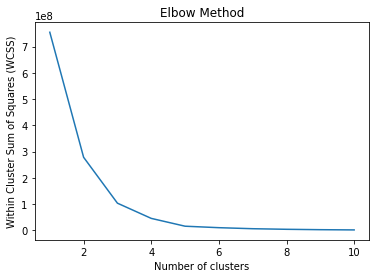

In [ ]:
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X_1)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 200,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(X_1)


# Plot the data


In [ ]:
pred_y

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int32)

In [ ]:
X_1.columns

Index(['PercentAverageGrowth', 'TotalPpeSchoolShare'], dtype='object')

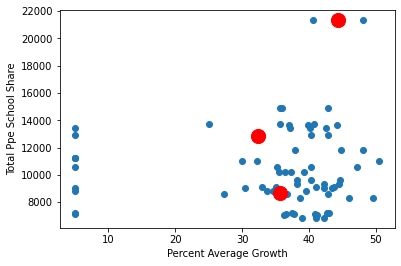

In [ ]:
plt.scatter(X_1["PercentAverageGrowth"],
X_1["TotalPpeSchoolShare"])

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.xlabel("Percent Average Growth")
plt.ylabel("Total Ppe School Share")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e115903d-6f9d-4ba6-a598-8111e36ee3b2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>